# Data Project - Stock Market Analysis<br>

Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:
<ul>
1.) What was the change in price of the stock over time?<br>
2.) What was the daily return of the stock on average?<br>
3.) What was the moving average of the various stocks?<br>
4.) What was the correlation between different stocks' closing prices?<br>
4.) What was the correlation between different stocks' daily returns?<br>
5.) How much value do we put at risk by investing in a particular stock?<br>
6.) How can we attempt to predict future stock behavior?<br>
    </ul>
Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [27]:
# For division
from __future__ import division

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to give us a white grid background
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime


In [28]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [29]:
# end time is today.  start is a year ago from today's date

end= datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [30]:
#for every stock in the tech list, call data reader.  it will take  4 arguments - stock ticker, what website, start date and end date.
#globals --> takes that stock ticker and making it into a global variable.  It will allow you to take the string name (AAPL) as the dataframe variable

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [31]:
# example of what globals()[stock] allows you to do.
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.308266
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.958794
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.148521
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.744728
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.918221
...,...,...,...,...,...,...
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.869995
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.720001
2020-12-31,134.740005,131.720001,134.080002,132.690002,98990400.0,132.690002


In [32]:
# another example of what globals()[stock] allows you to do
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,1396.500000,1350.000000,1350.000000,1394.209961,1732300,1394.209961
2020-01-07,1402.989990,1390.380005,1397.939941,1393.339966,1502700,1393.339966
2020-01-08,1411.579956,1390.839966,1392.079956,1404.319946,1528000,1404.319946
2020-01-09,1427.329956,1410.270020,1420.569946,1419.829956,1500900,1419.829956
2020-01-10,1434.928955,1418.349976,1427.560059,1429.729980,1820700,1429.729980


In [33]:
#gives you stat summary for AAPL stock
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,97.116532,94.336778,95.718508,95.785487,1.513298e+08,95.487268
std,22.239426,21.710876,22.160347,21.948422,7.404360e+07,22.093082
min,57.125000,53.152500,57.020000,56.092499,2.420510e+07,55.744217
25%,78.875000,76.809998,77.650002,77.532501,1.036256e+08,77.112686
50%,93.945000,92.010002,92.500000,92.845001,1.353724e+08,92.518288
75%,117.589996,114.540001,116.199997,115.970001,1.830554e+08,115.780251
max,138.789993,134.339996,138.050003,136.690002,4.268848e+08,136.690002


In [34]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-06 to 2021-01-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


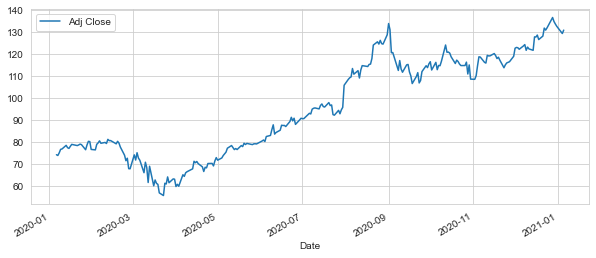

In [35]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

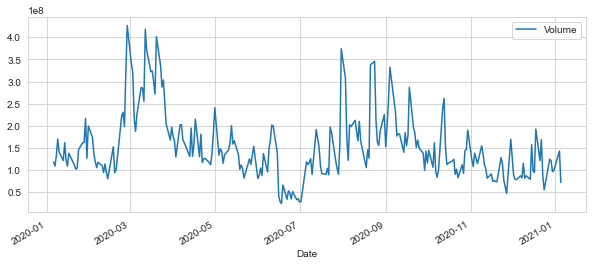

In [36]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [42]:
# moving averages

#going to average over 10 days, 20 days and 50 days
ma_day = [10,20,50]

#creating column name 
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
#creating new column in the AAPL dataframe,   
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

In [47]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.308266,NaN,NaN,NaN
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.958794,NaN,NaN,NaN
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.148521,NaN,NaN,NaN
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.744728,NaN,NaN,NaN
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.918221,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.869995,130.565000,126.699000,120.318440
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.720001,131.149001,127.249000,120.677235
2020-12-31,134.740005,131.720001,134.080002,132.690002,98990400.0,132.690002,131.637001,127.729500,120.984883


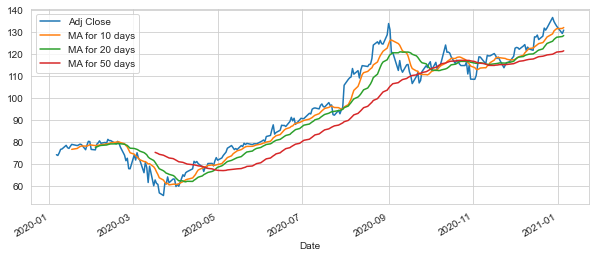

In [46]:
#subplots=False --> so that all plots are in one figure

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))

# Daily Return Analysis

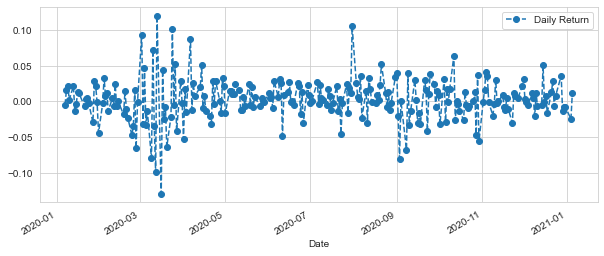

In [50]:
# Analyze daily returns and the risk of the stock, look at daily changes of the stock
# Plot daily returns for AAPL stock 

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--',marker='o')

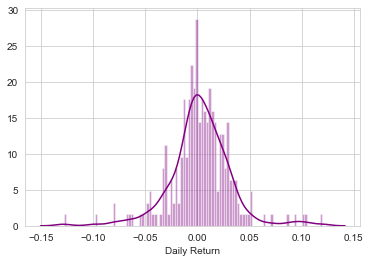

In [51]:
# Look at average daily return using seaborn histogram
# distplot allows you to place 2 plots on top of each other. (data visualization lectures)
sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color='purple')

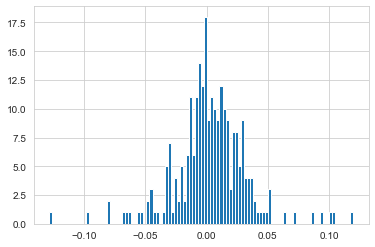

In [54]:
# another method is using pandas built-in histogram 
AAPL['Daily Return'].hist(bins=100)

In [55]:
# analyze returns of all the stocks in our list
# creating a new dataframe, using datareader - allows us to read stocks from the web using pandas
# passed tech_list, used yahoo finance, start date, end date.  And specified that you only want the adjusted closing price column
closing_df = DataReader(tech_list, 'yahoo', start,end)['Adj Close']

In [56]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-06,74.308266,1394.209961,157.362961,1902.880005
2020-01-07,73.958794,1393.339966,155.928177,1906.859985
2020-01-08,75.148521,1404.319946,158.411835,1891.969971
2020-01-09,76.744728,1419.829956,160.390869,1901.050049
2020-01-10,76.918221,1429.729980,159.648727,1883.160034
...,...,...,...,...
2020-12-29,134.869995,1758.719971,224.149994,3322.000000
2020-12-30,133.720001,1739.520020,221.679993,3285.850098
2020-12-31,132.690002,1751.880005,222.419998,3256.929932


In [57]:
tech_rets = closing_df.pct_change()
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,-0.004703,-0.000624,-0.009118,0.002092
2020-01-08,0.016086,0.007880,0.015928,-0.007809
2020-01-09,0.021241,0.011044,0.012493,0.004799
2020-01-10,0.002261,0.006973,-0.004627,-0.009411
...,...,...,...,...
2020-12-29,-0.013315,-0.009780,-0.003601,0.011584
2020-12-30,-0.008527,-0.010917,-0.011019,-0.010882
2020-12-31,-0.007703,0.007105,0.003338,-0.008801


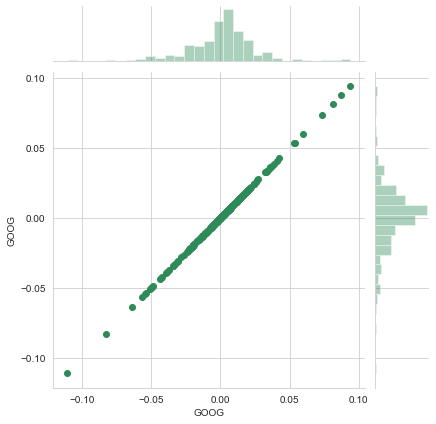

In [59]:
# 
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

C:\Users\mokae\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


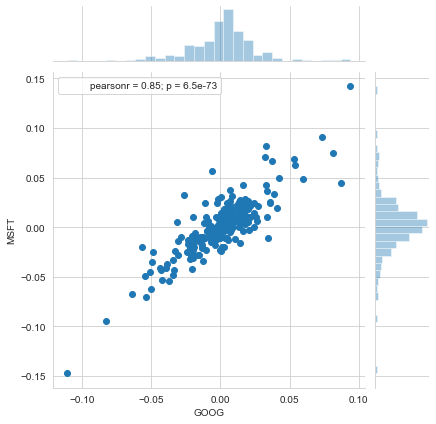

In [63]:
googmsft= sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

import scipy.stats as stats
googmsft.annotate(stats.pearsonr)

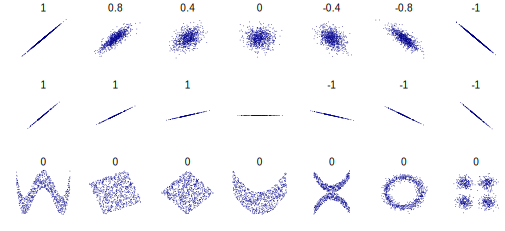

In [64]:
# Pearson correlation coefficient (pearsonr) shows correlation 

from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [65]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,-0.004703,-0.000624,-0.009118,0.002092
2020-01-08,0.016086,0.007880,0.015928,-0.007809
2020-01-09,0.021241,0.011044,0.012493,0.004799
2020-01-10,0.002261,0.006973,-0.004627,-0.009411


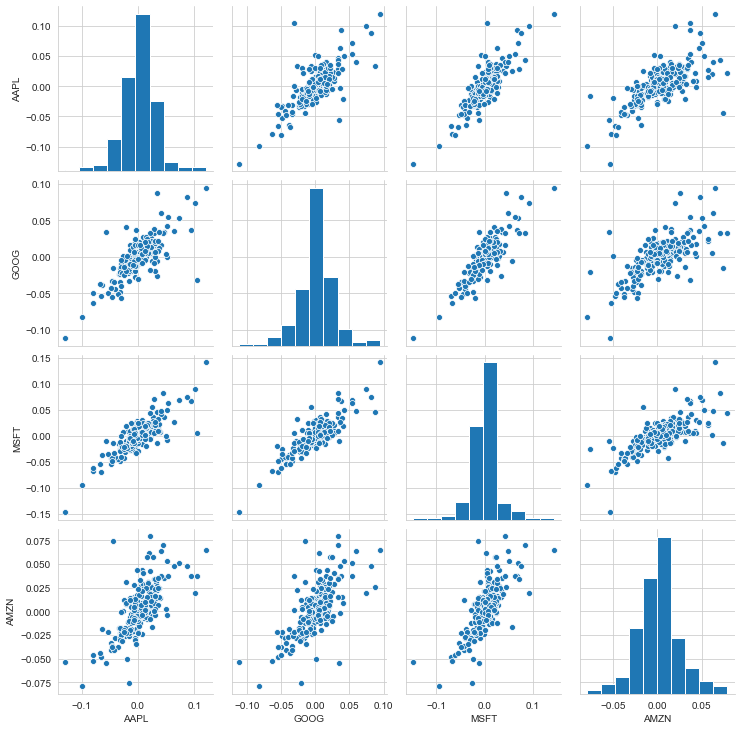

In [66]:
# pair plot shows histogram of every stock's daily return, and compares relationships between 
# different stocks

sns.pairplot(tech_rets.dropna())

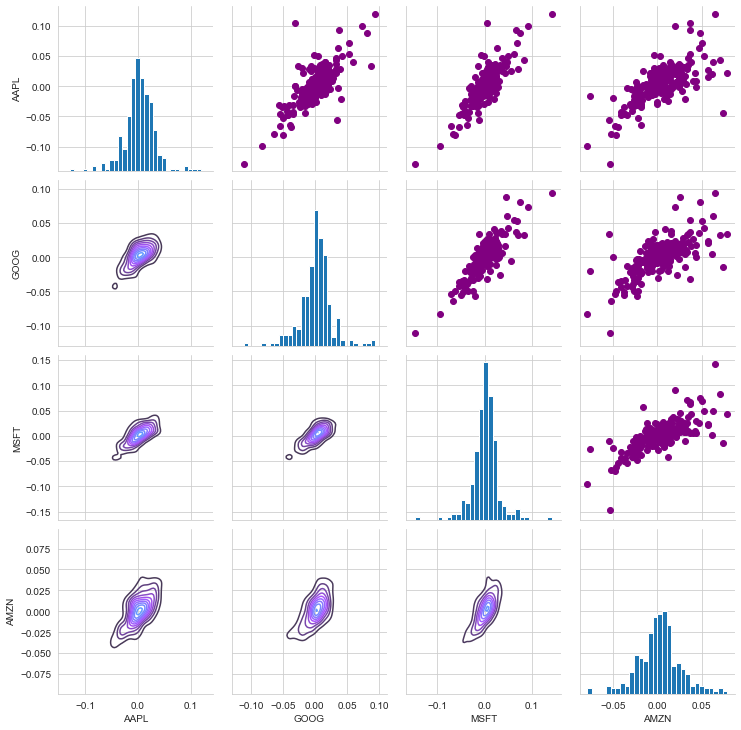

In [67]:
# can control over what goes into the diagonal, upper map and lower map of your figure

returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

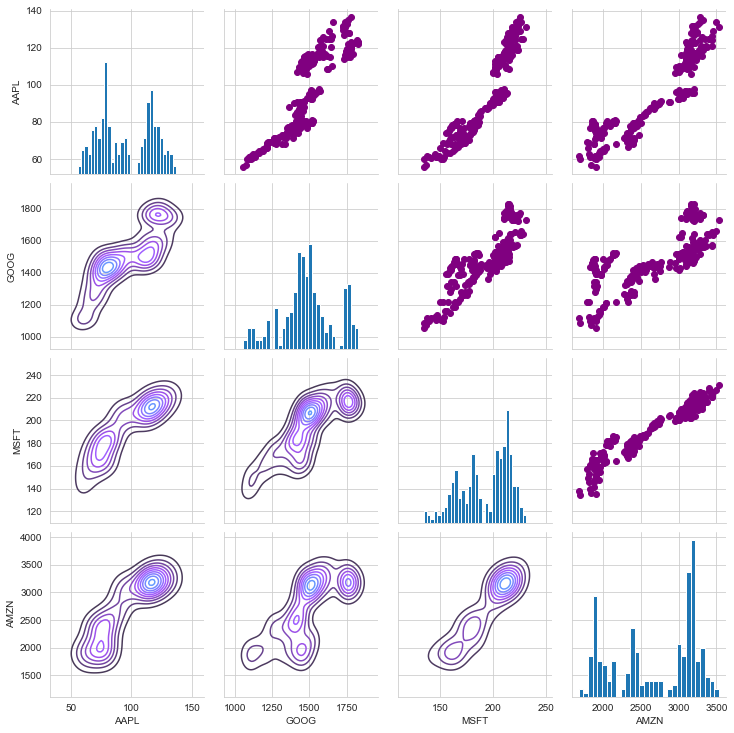

In [68]:
# look at correlations between closing price

returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

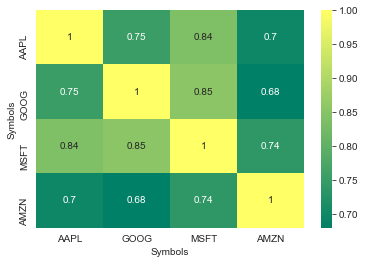

In [81]:
# look at actual numerical values of correlation between all the stocks, can do a correlation plot

tech_rets_corr= tech_rets.dropna().corr()

sns.heatmap(tech_rets_corr, annot=True, cmap='summer')

plt.show()

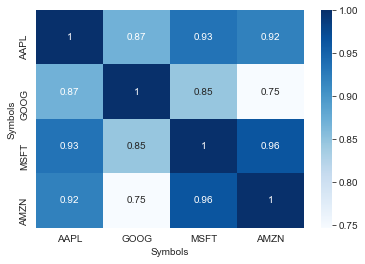

In [83]:
closing_corr = closing_df.corr()

sns.heatmap(closing_corr, annot=True, cmap='Blues')

plt.show()

# Actual Risk Analysis
<ul>
    <li>Risk is the standard deviation of your returns</li>
    <li>Can use data retrieved from Daily Returns to compare the expected return with the risk (standard deviation of the daily returns)

In [84]:
rets = tech_rets.dropna()

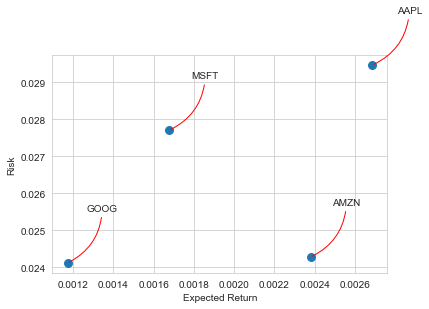

In [95]:
#define the area of the circles for the scatter plot so that you can see them better
area = np.pi*20 

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', color='red',connectionstyle = 'arc3,rad=-0.3'))

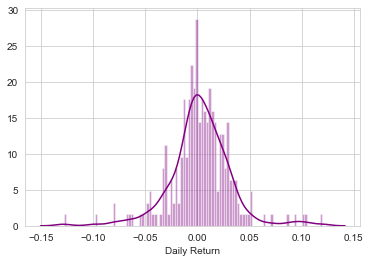

In [96]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [97]:
#use quantile to get the risk value of the stock

rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-07,-0.004703,-0.000624,-0.009118,0.002092
2020-01-08,0.016086,0.007880,0.015928,-0.007809
2020-01-09,0.021241,0.011044,0.012493,0.004799
2020-01-10,0.002261,0.006973,-0.004627,-0.009411
2020-01-13,0.021364,0.006645,0.012024,0.004323


In [99]:
# 95% confidence worse daily loss would not exceed 4.4%.  This is your value at risk.  
# 95% of the time your worse daily loss will not exceed 4.4%

rets['AAPL'].quantile(0.05)

-0.04486866478075284

In [102]:
# Monte Carlo method

#setting up time horizon
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [104]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    #define a price array ( price, shock and drift)- full of zeros with the length of number of days you want to run it
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale= sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price
    

In [105]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,1396.500000,1350.000000,1350.000000,1394.209961,1732300,1394.209961
2020-01-07,1402.989990,1390.380005,1397.939941,1393.339966,1502700,1393.339966
2020-01-08,1411.579956,1390.839966,1392.079956,1404.319946,1528000,1404.319946
2020-01-09,1427.329956,1410.270020,1420.569946,1419.829956,1500900,1419.829956
2020-01-10,1434.928955,1418.349976,1427.560059,1429.729980,1820700,1429.729980


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

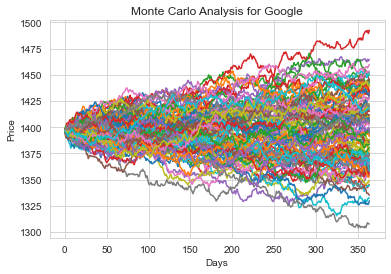

In [107]:
start_price = 1396.50

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [110]:
# create a histogram of these end results
# day-1 means previous day
# gathering an array of all ending pricepoints for 10000 runs

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

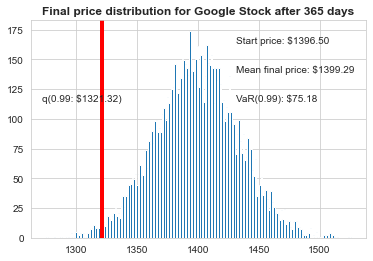

In [114]:
# use numpy to define q as the 1% empirical quantile - 99% of the values should fit within the output

q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#Starting price (text that will go on top of figure)
plt.figtext(0.6,0.8, s='Start price: $%.2f' %start_price)

#Mean ending price (text that will go on top of figure)
plt.figtext(0.6, 0.7, 'Mean final price: $%.2f' % simulations.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, 'VaR(0.99): $%.2f' % (start_price - q,))

# Display 1% quantile (text that will go on top of figure)
plt.figtext(0.15,0.6, 'q(0.99: $%.2f)' % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

#Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

# Results from the Monte Carlo analysis 
<ul>
    <li> This is a histogram of all the final prices.  </li>
    <li> Starting price = $1396.50, Avg price = $1399.29 , means pretty stable stock.</li>
    <li> Risk: 99% of the time (red line) stock value is 524.49 </li>
    <li> value at risk for each google stock will be 75.18,
    99% of the time that you run this monte carlo simulation, amount you would lose is 75.18</li>

# Additional Analysis

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.)  Look further into correlation of two stocks and see if that gives you any insight into future possible stock prices.